## A linear regression model, to predict Price.

### finding the least possible intercept

In [1]:
# importing the required models
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [4]:
df.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [5]:
df.corr()["Price"].sort_values(ascending=False) # higly correcolated features

Price           1.000000
ram             0.896915
ppi             0.817614
internal mem    0.776738
RearCam         0.739538
cpu freq        0.727383
cpu core        0.686811
Front_Cam       0.675286
battery         0.559946
resoloution     0.404010
Sale            0.273263
Product_id      0.165136
weight          0.144555
thickness      -0.716773
Name: Price, dtype: float64

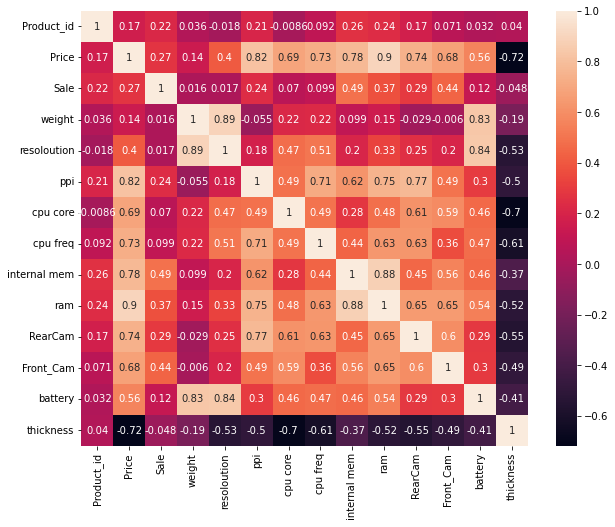

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, ax=ax)
plt.show()

In [7]:
# multi-linearity among features
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

vif_data.sort_values(['VIF'],ascending=False).groupby('VIF').head()

,feature,VIF
1,Price,144.434191
4,resoloution,144.405941
3,weight,84.640292
12,battery,60.678512
5,ppi,38.544335
9,ram,28.813570
7,cpu freq,28.317842
6,cpu core,18.610806
10,RearCam,14.826904
8,internal mem,13.458393


`having a very high VIF, is considered bad for modelling.`

In [8]:
# Model evaualtion Linear Regression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


feature_cols = ['Sale','weight','ppi','cpu core','cpu freq', 'internal mem',
                'ram', 'RearCam', 'resoloution','Front_Cam','battery', 'thickness']
X = df[feature_cols]
y = df.Price


# standard scaler
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Instantiate model
lm1 = LinearRegression()

# Fit Model
lm1.fit(X_train, y_train)

# Predict
y_pred = lm1.predict(X_test)



# Evaluation metrics
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE: ',metrics.mean_absolute_error(y_test, y_pred))
print()
print('R2_SCORE: ', r2_score(y_pred, y_test))
print('Intercept: ',lm1.intercept_)
print()
print('Coefficient: ',lm1.coef_)

RMSE:  158.48875495780507
MAE:  132.32993917475892

R2_SCORE:  0.947362837837701
Intercept:  1825.7804627932996

Coefficient:  [-2.29303660e-02 -5.73662748e-01  1.17425056e+00  4.50371381e+01
  1.09108931e+02  6.67918606e+00  8.00040887e+01  3.57785167e+00
 -6.99963445e+01  9.33834560e+00  1.37222485e-01 -8.12620500e+01]


In [9]:
Prediction =pd.DataFrame({'Actual Values':y_test, 'Predicted Values':y_pred})
Prediction

,Actual Values,Predicted Values
44,2859,2993.820629
47,3316,2848.855912
110,754,911.680997
77,1396,1514.836832
158,3260,3088.862512
11,2006,1840.407759
116,3287,3118.878344
35,2654,2738.883087
145,1921,1757.066713
14,2580,2414.246068


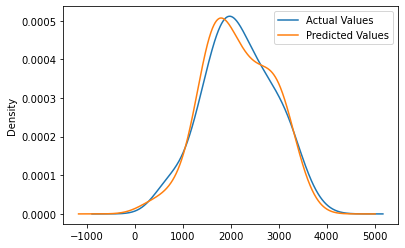

In [10]:
Prediction['Actual Values'].plot(kind='kde',label='Actual Values')
Prediction['Predicted Values'].plot(kind='kde',label='Predicted Values')
plt.legend()

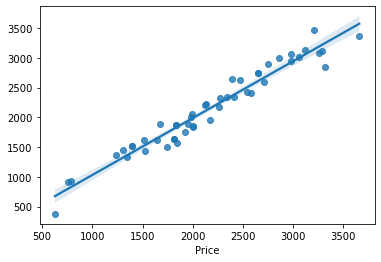

In [11]:
sns.regplot(x=y_test,y=y_pred);

In [12]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('Sale', -0.022930366028003153),
 ('weight', -0.5736627476489935),
 ('ppi', 1.1742505566573076),
 ('cpu core', 45.037138099173475),
 ('cpu freq', 109.10893078654246),
 ('internal mem', 6.679186062523708),
 ('ram', 80.00408872738849),
 ('RearCam', 3.577851667650002),
 ('resoloution', -69.99634449621833),
 ('Front_Cam', 9.338345604344378),
 ('battery', 0.13722248547764432),
 ('thickness', -81.26205003581715)]

## Using Outliers to increase model performace

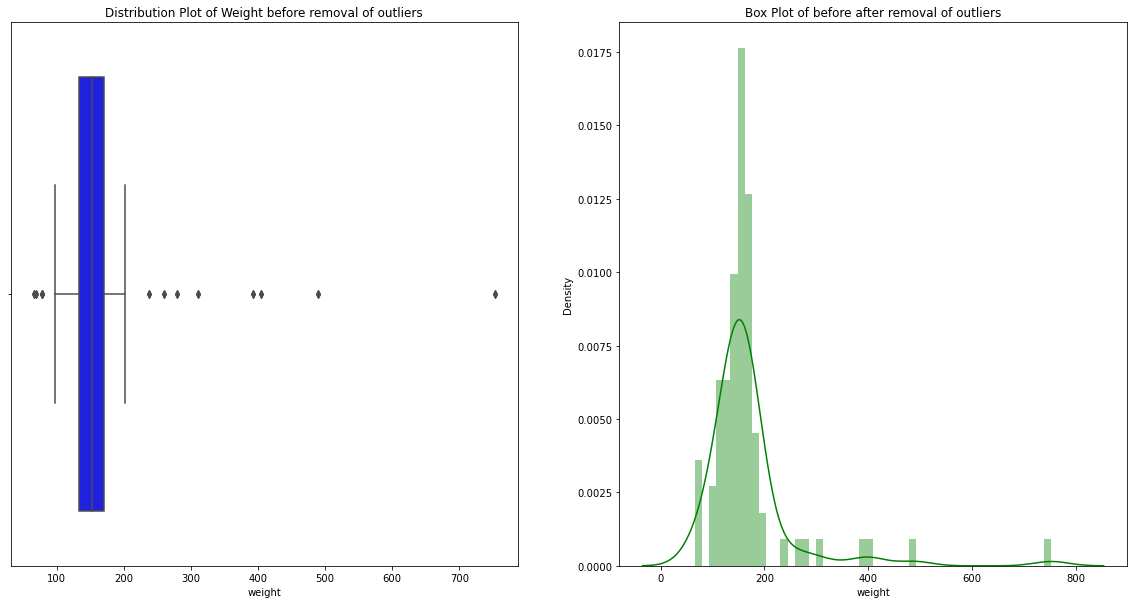

In [13]:
# applying outliers on weight 
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['weight'], ax = ax[0], color = 'b')
sns.distplot(df['weight'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Weight before removal of outliers')
ax[1].set_title('Box Plot of before after removal of outliers')
plt.show()

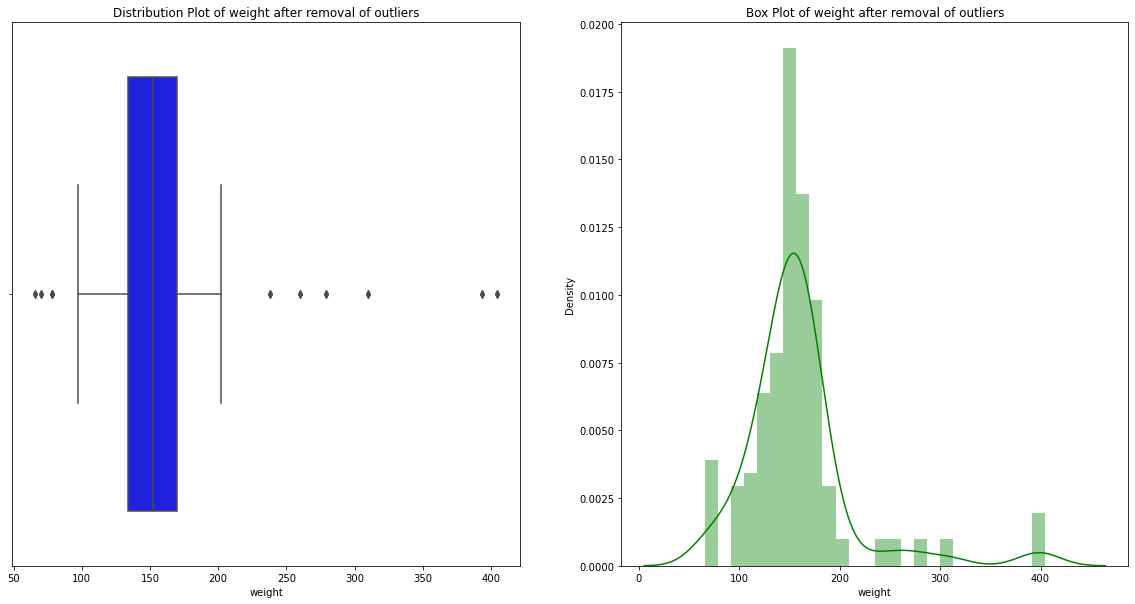

In [14]:
lower_limit = df['weight'].mean() - 3*df['weight'].std()
upper_limit = df['weight'].mean() + 3*df['weight'].std()

df = df[df['weight'] < upper_limit ]
df[df['weight'] < lower_limit ]


fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['weight'], ax = ax[0], color = 'b')
sns.distplot(df['weight'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of weight after removal of outliers')
ax[1].set_title('Box Plot of weight after removal of outliers')
plt.show()

Check the diagram `x` and `y` axis for changes

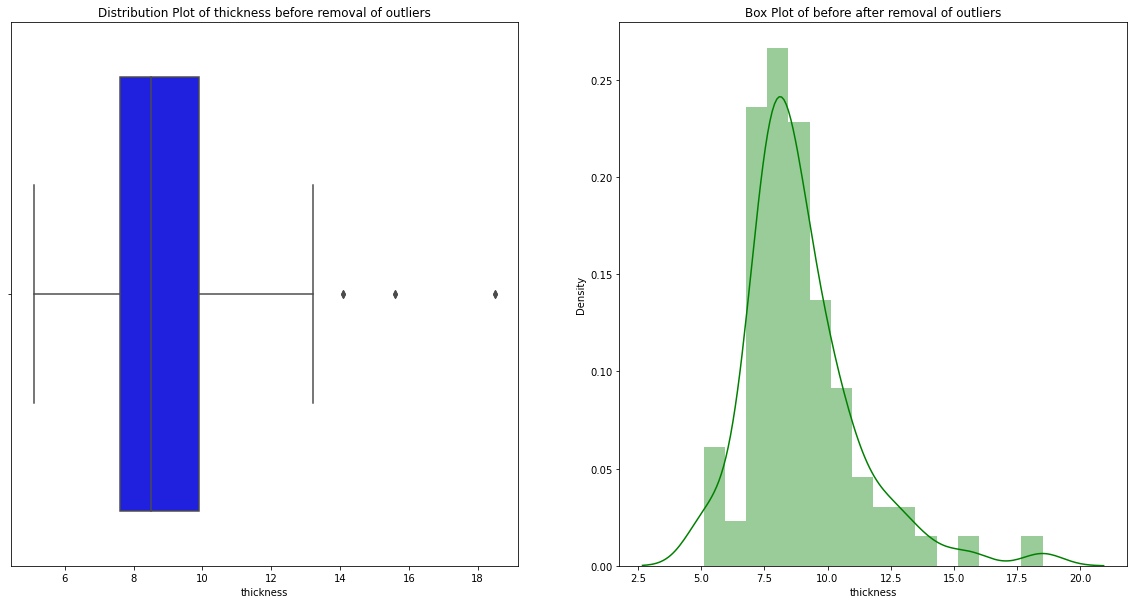

In [15]:
# working on thickness
fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['thickness'], ax = ax[0], color = 'b')
sns.distplot(df['thickness'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of thickness before removal of outliers')
ax[1].set_title('Box Plot of before after removal of outliers')
plt.show()

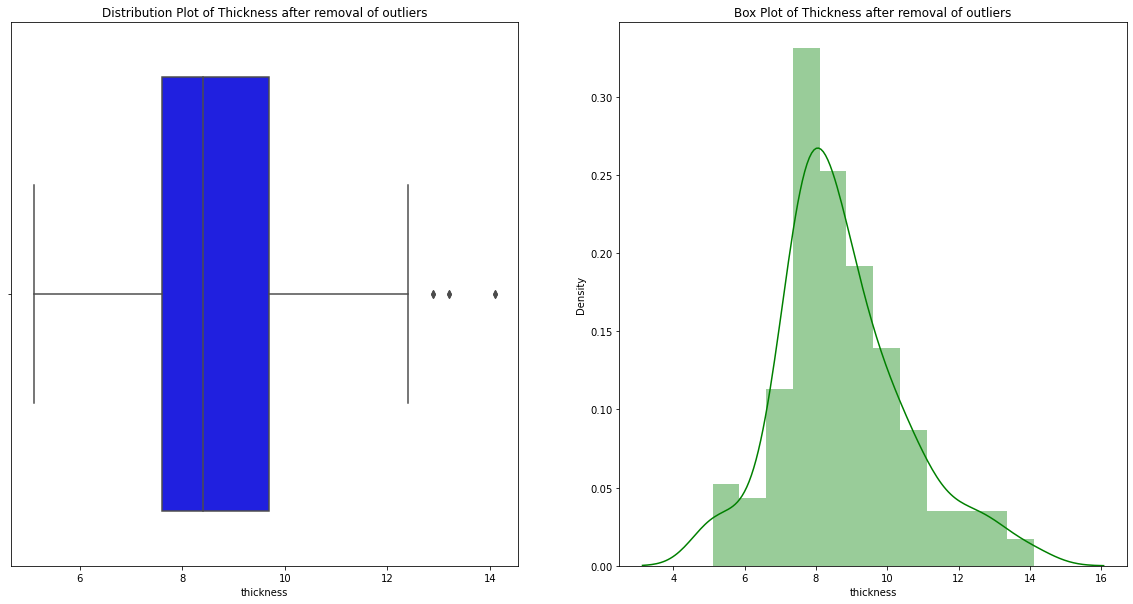

In [16]:
lower_limit_ = df['thickness'].mean() - 3*df['thickness'].std()
upper_limit_ = df['thickness'].mean() + 3*df['thickness'].std()

df = df[df['thickness'] < upper_limit_ ]
df[df['thickness'] < lower_limit_ ]


fig, ax = plt.subplots(1,2, figsize = (20,10))
sns.boxplot(df['thickness'], ax = ax[0], color = 'b')
sns.distplot(df['thickness'], ax = ax[1], color = 'g')
ax[0].set_title('Distribution Plot of Thickness after removal of outliers')
ax[1].set_title('Box Plot of Thickness after removal of outliers')
plt.show()

Check the diagram `x` and `y` axis for changes

In [17]:
# Model evaualtion Linear Regression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


feature_cols = ['Sale','weight','ppi','cpu core','cpu freq', 'internal mem',
                'ram', 'RearCam', 'resoloution','Front_Cam','battery', 'thickness']
X_ = df[feature_cols]
y_ = df.Price


# standard scaler
scaler = StandardScaler()
scaler.fit(X)
scaler.transform(X)


# Split data
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_,test_size=0.3, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train_, y_train_)

# Predict
y_pred_ = lm2.predict(X_test_)



# Evaluation metrics
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test_, y_pred_)))
print('MAE: ',metrics.mean_absolute_error(y_test_, y_pred_))
print()
print('R2_SCORE: ', r2_score(y_pred_, y_test_))
print('Intercept: ',lm2.intercept_)
print()
print('Coefficient: ',lm2.coef_)

RMSE:  168.8444448935871
MAE:  136.93453128875896

R2_SCORE:  0.9486294838909746
Intercept:  1832.452141428483

Coefficient:  [-1.27840603e-02 -1.27073490e+00  1.14228154e+00  4.32040195e+01
  1.32715562e+02  6.26023912e+00  4.12864503e+01  5.85695970e+00
 -5.28871486e+01  1.01502465e+01  1.84103328e-01 -8.95083748e+01]


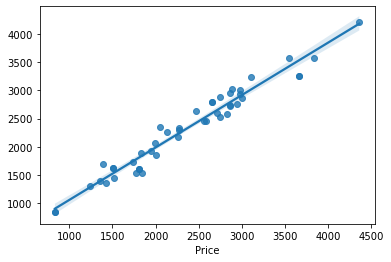

In [18]:
sns.regplot(x=y_test_,y=y_pred_);

In [19]:
Prediction_ =pd.DataFrame({'Actual Values':y_test_, 'Predicted Values':y_pred_})
Prediction_

,Actual Values,Predicted Values
61,2746,2881.978355
33,2654,2791.771733
71,2276,2334.884838
133,2266,2290.620728
31,2977,3010.920014
109,2858,2732.695292
99,1511,1620.106641
14,2580,2463.557243
55,1777,1534.781949
46,1421,1354.814655


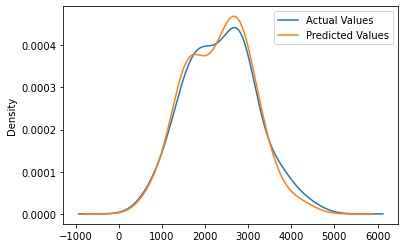

In [20]:
Prediction_['Actual Values'].plot(kind='kde',label='Actual Values')
Prediction_['Predicted Values'].plot(kind='kde',label='Predicted Values')
plt.legend()